In [11]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ruizgara_socofing_path = kagglehub.dataset_download('ruizgara/socofing')

print('Data source import complete.')


Data source import complete.


In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/282__M_Left_little_finger_Zcut.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/424__M_Right_middle_finger_Zcut.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/87__M_Right_index_finger_Obl.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/402__M_Right_ring_finger_Obl.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/472__M_Left_middle_finger_CR.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/124__M_Right_middle_finger_CR.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/244__M_Left_index_finger_Obl.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/20__M_Left_ring_finger_Zcut.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/7__M_Left_index_finger_Obl.BMP
/kaggle/input/socofing/socofing/SOCOFing/Altered/Altered-Hard/8__M_Right_index_finger_CR.BM

In [13]:
import os

print("Dataset path:", ruizgara_socofing_path)

for dirname, _, filenames in os.walk(ruizgara_socofing_path):
    print(dirname)
    for filename in filenames[:]:
        print("  ", filename)


Streaming output truncated to the last 5000 lines.
   282__M_Left_little_finger_Zcut.BMP
   424__M_Right_middle_finger_Zcut.BMP
   87__M_Right_index_finger_Obl.BMP
   402__M_Right_ring_finger_Obl.BMP
   472__M_Left_middle_finger_CR.BMP
   124__M_Right_middle_finger_CR.BMP
   244__M_Left_index_finger_Obl.BMP
   20__M_Left_ring_finger_Zcut.BMP
   7__M_Left_index_finger_Obl.BMP
   8__M_Right_index_finger_CR.BMP
   105__M_Left_middle_finger_Obl.BMP
   392__M_Right_thumb_finger_CR.BMP
   186__M_Left_ring_finger_CR.BMP
   337__F_Left_thumb_finger_Zcut.BMP
   83__M_Right_thumb_finger_Obl.BMP
   440__M_Left_index_finger_Obl.BMP
   568__M_Left_middle_finger_CR.BMP
   514__F_Right_ring_finger_Obl.BMP
   400__M_Left_ring_finger_CR.BMP
   44__M_Right_thumb_finger_CR.BMP
   63__M_Left_little_finger_Zcut.BMP
   299__M_Left_thumb_finger_Obl.BMP
   433__M_Right_thumb_finger_Obl.BMP
   519__M_Right_ring_finger_Obl.BMP
   205__F_Right_little_finger_Obl.BMP
   99__M_Right_index_finger_CR.BMP
   169__F_Ri

In [14]:

from google.colab import files
files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
labels=pd.read_csv('gender_labels(2).csv')

Saving gender_labels(2).csv to gender_labels(2) (4).csv


In [15]:
labels

,filepath,gender,Hand,Finger
0,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Right,index
1,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Right,little
2,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Left,thumb
3,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Left,middle
4,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Right,ring
...,...,...,...,...
5995,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Left,thumb
5996,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Right,thumb
5997,/root/.cache/kagglehub/datasets/ruizgara/socof...,1,Left,ring
5998,/root/.cache/kagglehub/datasets/ruizgara/socof...,0,Left,middle


In [16]:
correct_base_path = "/kaggle/input/socofing/SOCOFing/Real/"
labels['filepath'] = labels['filepath'].apply(lambda x: os.path.join(correct_base_path, os.path.basename(x)))
labels

,filepath,gender,Hand,Finger
0,/kaggle/input/socofing/SOCOFing/Real/176__M_Ri...,0,Right,index
1,/kaggle/input/socofing/SOCOFing/Real/506__M_Ri...,0,Right,little
2,/kaggle/input/socofing/SOCOFing/Real/367__M_Le...,0,Left,thumb
3,/kaggle/input/socofing/SOCOFing/Real/350__M_Le...,0,Left,middle
4,/kaggle/input/socofing/SOCOFing/Real/49__M_Rig...,0,Right,ring
...,...,...,...,...
5995,/kaggle/input/socofing/SOCOFing/Real/440__M_Le...,0,Left,thumb
5996,/kaggle/input/socofing/SOCOFing/Real/108__M_Ri...,0,Right,thumb
5997,/kaggle/input/socofing/SOCOFing/Real/461__F_Le...,1,Left,ring
5998,/kaggle/input/socofing/SOCOFing/Real/451__M_Le...,0,Left,middle


In [17]:
!pip install albumentations opencv-python-headless --quiet

In [18]:
import os

# List the root input directory
print("Listing /kaggle/input:")
print(os.listdir('/kaggle/input'))

# If you see your dataset there, list inside it
dataset_name = 'socofing'  # or replace with exact name if different
dataset_path = f'/kaggle/input/{dataset_name}'
print(f"\nListing {dataset_path}:")
print(os.listdir(dataset_path))


Listing /kaggle/input:
['socofing']

Listing /kaggle/input/socofing:
['SOCOFing', 'socofing']


In [19]:
import os

base_path = '/kaggle/input/socofing/SOCOFing/Real'

# Show first few image file paths
for fname in os.listdir(base_path):
    if fname.endswith(".BMP"):
        print(os.path.join(base_path, fname))
        break  # just print one for now


/kaggle/input/socofing/SOCOFing/Real/171__M_Left_little_finger.BMP


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


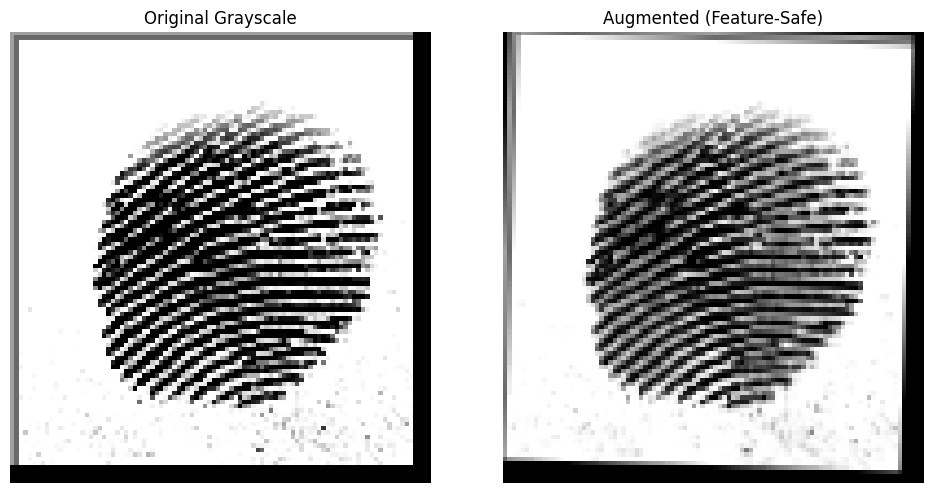

In [20]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
transform = A.Compose([
    A.Rotate(limit=10, p=0.6),
    A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.05, rotate_limit=10, p=0.6, border_mode=cv2.BORDER_REFLECT),
    A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.3),
    A.GridDistortion(num_steps=3, distort_limit=0.02, p=0.2)  # subtle distortion
    # Removed: GaussianBlur, ElasticTransform, CoarseDropout
])

img_path = "/kaggle/input/socofing/SOCOFing/Real/171__M_Left_little_finger.BMP"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("❌ Failed to load image. Check the file path.")
else:
    augmented = transform(image=img)['image']
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Grayscale")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Augmented (Feature-Safe)")
    plt.imshow(augmented, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [21]:
pip install tensorflow

In [22]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import albumentations as A
from albumentations.pytorch import ToTensorV2
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model


In [23]:
transform = A.Compose([
    A.Rotate(limit=10, p=0.7),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.8, border_mode=cv2.BORDER_REFLECT),
    A.RandomBrightnessContrast(p=0.3),
    A.CoarseDropout(max_holes=1, max_height=10, max_width=10, fill_value=255, p=0.2)
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-23-3062978520>:5: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=1, max_height=10, max_width=10, fill_value=255, p=0.2)


In [24]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  6000 non-null   object
 1   gender    6000 non-null   int64 
 2   Hand      6000 non-null   object
 3   Finger    6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


In [25]:
labels

,filepath,gender,Hand,Finger
0,/kaggle/input/socofing/SOCOFing/Real/176__M_Ri...,0,Right,index
1,/kaggle/input/socofing/SOCOFing/Real/506__M_Ri...,0,Right,little
2,/kaggle/input/socofing/SOCOFing/Real/367__M_Le...,0,Left,thumb
3,/kaggle/input/socofing/SOCOFing/Real/350__M_Le...,0,Left,middle
4,/kaggle/input/socofing/SOCOFing/Real/49__M_Rig...,0,Right,ring
...,...,...,...,...
5995,/kaggle/input/socofing/SOCOFing/Real/440__M_Le...,0,Left,thumb
5996,/kaggle/input/socofing/SOCOFing/Real/108__M_Ri...,0,Right,thumb
5997,/kaggle/input/socofing/SOCOFing/Real/461__F_Le...,1,Left,ring
5998,/kaggle/input/socofing/SOCOFing/Real/451__M_Le...,0,Left,middle


In [26]:
labels['Hand'] = labels['Hand'].astype(str).str.strip().str.capitalize()
labels['Finger'] = labels['Finger'].astype(str).str.strip().str.lower()


labels['Hand'] = labels['Hand'].map({'Left': 0, 'Right': 1})
finger_map = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
labels['Finger'] = labels['Finger'].map(finger_map)
labels['gender'] = labels['gender'].astype(int)

labels


,filepath,gender,Hand,Finger
0,/kaggle/input/socofing/SOCOFing/Real/176__M_Ri...,0,1,1
1,/kaggle/input/socofing/SOCOFing/Real/506__M_Ri...,0,1,4
2,/kaggle/input/socofing/SOCOFing/Real/367__M_Le...,0,0,0
3,/kaggle/input/socofing/SOCOFing/Real/350__M_Le...,0,0,2
4,/kaggle/input/socofing/SOCOFing/Real/49__M_Rig...,0,1,3
...,...,...,...,...
5995,/kaggle/input/socofing/SOCOFing/Real/440__M_Le...,0,0,0
5996,/kaggle/input/socofing/SOCOFing/Real/108__M_Ri...,0,1,0
5997,/kaggle/input/socofing/SOCOFing/Real/461__F_Le...,1,0,3
5998,/kaggle/input/socofing/SOCOFing/Real/451__M_Le...,0,0,2


In [27]:
X = []
y_gender = []
y_hand = []
y_finger = []

N_AUGMENTATIONS = 5  # how many augmented copies per image

for i, row in tqdm(labels.iterrows(), total=len(labels)):
    path = row['filepath']

    if not os.path.exists(path):
        print(f"Missing: {path}")
        continue

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to read image: {path}")
        continue

    img = cv2.resize(img, (96, 96))

    real_img = np.expand_dims(img, axis=-1)  # (96,96,1)
    X.append(real_img)
    y_gender.append(row['gender'])
    y_hand.append(row['Hand'])
    y_finger.append(row['Finger'])

    for _ in range(N_AUGMENTATIONS):
        augmented = transform(image=img)['image']
        augmented = np.expand_dims(augmented, axis=-1)  # ensure shape
        X.append(augmented)
        y_gender.append(row['gender'])
        y_hand.append(row['Hand'])
        y_finger.append(row['Finger'])

X = np.array(X).reshape(-1, 96, 96, 1) / 255.0
y_gender = np.array(y_gender)
y_hand = np.array(y_hand)
y_finger = np.array(y_finger)

print("Final dataset size:", len(X))


100%|██████████| 6000/6000 [00:59<00:00, 101.42it/s]


Final dataset size: 36000


In [28]:
X_train, X_test, yg_train, yg_test, yh_train, yh_test, yf_train, yf_test = train_test_split(
    X, y_gender, y_hand, y_finger, test_size=0.2, random_state=42)


In [29]:
input_layer = Input(shape=(96, 96, 1))

x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', name='features')(x)
# x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
# x = layers.Dense(32, activation='relu', name='features2')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.4)(x)

gender_output = layers.Dense(1, activation='sigmoid', name='gender')(x)
hand_output = layers.Dense(1, activation='sigmoid', name='hand')(x)
finger_output = layers.Dense(5, activation='softmax', name='finger')(x)

model = Model(inputs=input_layer, outputs=[gender_output, hand_output, finger_output])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 94, 94,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 47, 47,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 45, 45,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 22, 22,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 20, 20,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 10, 10,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 12800)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 12800)     │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ features (Dense)    │ (None, 128)       │  1,638,528 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ features[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender (Dense)      │ (None, 1)         │        129 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hand (Dense)        │ (None, 1)         │        129 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ finger (Dense)      │ (None, 5)         │        645 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,732,103 (6.61 MB)

 Trainable params: 1,732,103 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model = Model(inputs=input_layer, outputs=[gender_output, hand_output, finger_output])

model.compile(optimizer='adam',
              loss={'gender': 'binary_crossentropy', 'hand': 'binary_crossentropy', 'finger': 'sparse_categorical_crossentropy'},
              metrics={'gender': 'accuracy', 'hand': 'accuracy', 'finger': 'accuracy'})

In [32]:
history=model.fit(X_train, {'gender': yg_train, 'hand': yh_train, 'finger': yf_train},
          validation_data=(X_test, {'gender': yg_test, 'hand': yh_test, 'finger': yf_test}),
          epochs=50, batch_size=32)

Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - finger_accuracy: 0.7760 - finger_loss: 0.5577 - gender_accuracy: 0.8455 - gender_loss: 0.3453 - hand_accuracy: 0.9432 - hand_loss: 0.1359 - loss: 1.0389 - val_finger_accuracy: 0.8001 - val_finger_loss: 0.5470 - val_gender_accuracy: 0.8512 - val_gender_loss: 0.3440 - val_hand_accuracy: 0.9526 - val_hand_loss: 0.1192 - val_loss: 1.0102
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - finger_accuracy: 0.7796 - finger_loss: 0.5582 - gender_accuracy: 0.8470 - gender_loss: 0.3425 - hand_accuracy: 0.9413 - hand_loss: 0.1405 - loss: 1.0412 - val_finger_accuracy: 0.8044 - val_finger_loss: 0.5430 - val_gender_accuracy: 0.8522 - val_gender_loss: 0.3446 - val_hand_accuracy: 0.9540 - val_hand_loss: 0.1211 - val_loss: 1.0087
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - finger_accuracy: 0.7833 - finger_loss: 0.5515 - gender_accuracy: 0.8509 - gender_loss: 0.3319 - hand_accuracy: 0.9456 - hand_loss: 0.1347 - loss: 1.0181 - val_f

In [33]:
# Save the model in HDF5 format
model.save('multi_output_model.h5')
#

In [34]:
from google.colab import files
files.download('multi_output_model.h5')
#

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>